# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.54.1 requires setuptools, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Import all the necessary libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [6]:
# Define the path where the dataset is located
path = r'C:\Users\galon\OneDrive\Documentos\UT-PGP\PROJECTS\Month3_SupervisedLearning\used_device_data.csv'

## Loading the dataset

In [284]:
# Load the dataset
data = pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [285]:
# First look at the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [286]:
# Let's observe the data types of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observations:
We can see how most fields are numeric but there are some that are not, which will certainly cause problems on the modelling and we'll have to decide how to treat them. Most likely we'll drop certain features and create some bins and dummies for others, regarding their value and our own analytical and exploratory interests within the datset.

In [287]:
# Let's see an statistical summary of our dataset
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


#### Observations:
Of course we can only see the numerical fields in the summary above, which confirms what we had already seen about the data types with the information of our dataset.

From the description above we can see that there are some fields with null values, that we'll explore later and treat accordingly, as we see that the total number of rows  is: 3454, and a few fields have a count smaller than that.
The difference between the maximum and minimum in pretty much every field is remarkable, hihglighting the heterogeneity of the product, in this case, smartphones. This suggests that there are probably phones notably older than others, which is confirmed by the release_year field (7 year range can surely lead to such difference in the IT industry), which, in this industry can impact notably on the price of the product.

As final observations, regarding the mean, the median and the max of certain fields, like int_memory, main_camera_mp, selfie_camera_mp or battery, we can infer how their distributions are right-skewed to some extent. The maximum value being so much greater than the median and the median and mean being somewhat dissimilar highlight once again the difference between older generation and newer generation phones as well as between high-end and low-budget phones. The rest of fields seem to have a pretty symmetrical distribution.

In [288]:
# As a final step of this initial exploration let's see the number of null values
data.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observations:
There are registries that have null values in a few fields, as we had already seen. It's important to quantify these null values and have and idea of their volume so we can note these first glance observations to be able to treat them accordingly in the Data Preprocessing section. An important thing to note already is that only numerical fields have null values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

Text(0.5, 1.0, 'Histogram: Normalized Price of Used Devices')

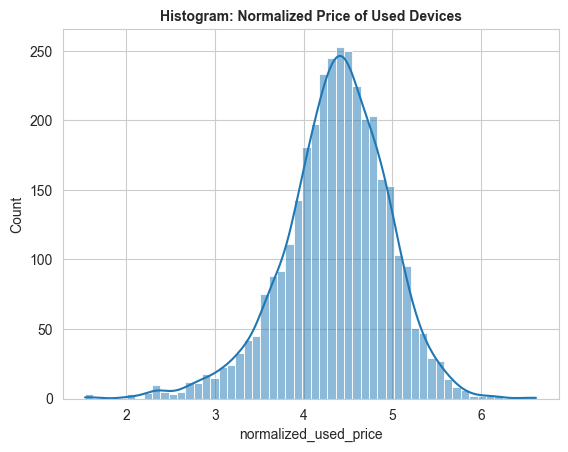

In [290]:
# We are going to explore the distribution of the normalized_used_price field through a histogram

sns.histplot(data = data, x = 'normalized_used_price', kde = True)\
.set_title("Histogram: Normalized Price of Used Devices", fontsize=10, fontweight='bold')

#### Observations:
As previously inferred in the initial observations, from the above histogram we can say that the normalized used price follows approximately a normal distribution.

In [291]:
# We calculate and plot the percentages each OS represents in the market

print(f"The percentage of Android OS phones on the market is: {round(data['os'].value_counts(normalize=True).max() * 100, 2)}%")

The percentage of Android OS phones on the market is: 93.05%


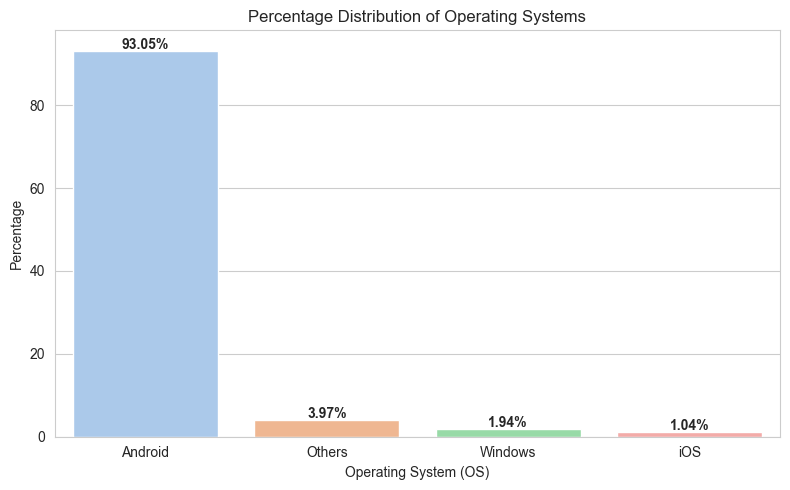

In [292]:
# Calculate percentage distribution. Note we use the mul method this time for clarity (we don't get the max this time).
os_percentage = data['os'].value_counts(normalize=True).mul(100).round(2)

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=os_percentage.index, y=os_percentage.values, palette='pastel')

# Add labels
plt.ylabel('Percentage')
plt.xlabel('Operating System (OS)')
plt.title('Percentage Distribution of Operating Systems')
plt.ylim(0, os_percentage.max() + 5) # We set the limit for a better presentation

# Annotate bars so we can see the percentages above each bar (0.5 above each bar)
for i, v in enumerate(os_percentage.values):
    plt.text(i, v + 0.5, f"{v}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

#### Observations:
As it can be seen in the diagram and the computations implemented above, Android OS clearly dominates the market of used smartphones.

In [293]:
# Let's compute the mean RAM per brand
# Group and aggregate to obtain different statistical values
price_stats_by_brand = data.groupby('brand_name')['normalized_used_price'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
).round(2).sort_values(by='mean', ascending=False)

# Display the result
print(price_stats_by_brand)

            count  mean  median   min   max
brand_name                                 
OnePlus        22  5.15    5.17  4.44  5.71
Apple          39  5.00    5.01  3.88  6.16
Google         15  4.89    4.87  4.46  5.57
Vivo          117  4.78    4.81  3.38  5.56
Oppo          129  4.76    4.78  3.54  6.14
Xiaomi        132  4.71    4.69  3.42  6.62
Honor         116  4.67    4.68  3.85  5.56
Huawei        251  4.65    4.69  3.03  6.50
Meizu          62  4.62    4.63  3.95  5.57
Realme         41  4.59    4.66  2.67  5.26
Sony           86  4.54    4.54  3.39  5.48
Asus          122  4.51    4.47  3.52  5.72
Samsung       341  4.47    4.51  2.05  5.98
Motorola      106  4.43    4.46  2.83  5.64
HTC           110  4.41    4.43  3.46  5.41
Coolpad        22  4.40    4.31  4.05  5.17
Infinix        10  4.39    4.41  4.18  4.56
Lenovo        171  4.38    4.42  3.18  5.44
ZTE           140  4.37    4.37  3.17  5.67
Gionee         56  4.33    4.35  3.10  5.67
BlackBerry     22  4.31    4.29 

#### Observations:
Through the analysis above we can say that there is a difference in price between brands. However, we do not know if this price difference is due to the brand or to the specifications that go along with them. This is, brands like OnePlus, Apple or Google are known for making high-quality smartphones, they fall on the high-end category. The change in the price could be driven by the specifications that are common to high-end phones rather than just to the brand itself.

We'll hace to study through model implementation how relevant and impactful this feature is regarding the price of the phone.

And important thing to note about this and subsequent observations is that we do not have the same sample size for every brand, which can impact how reliable the information is and how good they represent the reality of each brand included.

In [294]:
# Let's compute the mean RAM per brand
# Group and aggregate to obtain different statistical values
ram_stats_by_brand = data.groupby('brand_name')['ram'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
).round(2).sort_values(by='mean', ascending=False)

# Display the result
print(ram_stats_by_brand)

            count  mean  median   min   max
brand_name                                 
OnePlus        22  6.36    6.00  4.00  12.0
Oppo          129  4.96    4.00  1.00  12.0
Vivo          117  4.76    4.00  0.50   8.0
Huawei        251  4.66    4.00  0.25  12.0
Honor         116  4.60    4.00  2.00   8.0
Xiaomi        132  4.58    4.00  2.00  12.0
Google         15  4.53    4.00  4.00   6.0
Meizu          62  4.45    4.00  2.00   8.0
Samsung       341  4.20    4.00  0.25  12.0
Realme         41  4.20    4.00  2.00   6.0
Sony           86  4.07    4.00  4.00   8.0
Asus          122  4.05    4.00  2.00   8.0
ZTE           140  4.02    4.00  0.25   8.0
HTC           110  4.00    4.00  3.00   6.0
Apple          39  4.00    4.00  2.00   6.0
XOLO           49  4.00    4.00  4.00   4.0
Microsoft      22  4.00    4.00  4.00   4.0
Panasonic      47  4.00    4.00  4.00   4.0
Coolpad        22  3.95    4.00  3.00   4.0
LG            201  3.94    4.00  0.25   8.0
Motorola      106  3.94    4.00 

#### Observations:
From the information above we can see that most of the brands have phones with an average of around 4GB of RAM or 3GB of RAM. However there are some brands like Nokia, Infinix and Celkon that have a lower mean, specially this last one with less than 2GB. Moreover, there is a brand with a higher mean than the rest: OnePlus, with 6GM RAM per average.

You can also see a high range in RAM for almost every brand, having phones with a range min-max of 4 or 6GB of RAM, which highlights again the heterogeneity in the phone market, there are even brands like Celkon with a median of 0.25GB of RAM which is certainly low for nowadays market, also producing average 4GB RAM phones. 

These observations are reinforced by the histogram plotted below, that shows the ditribution of the RAM processing capacity of the phones in the market which shows how centered it is around 4GB.

Text(0.5, 1.0, 'Histogram: RAM of Devices (GB)')

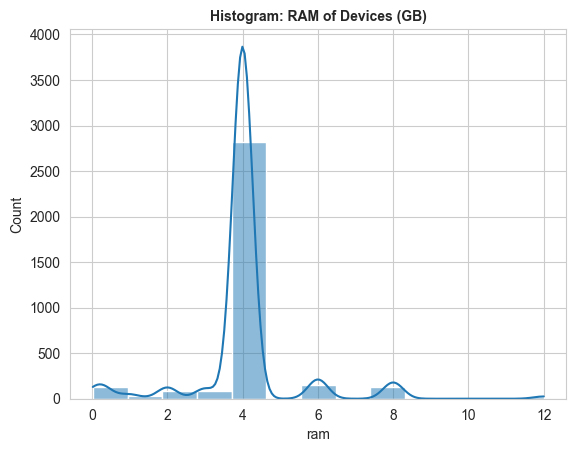

In [295]:
# Histogram of RAM

sns.histplot(data = data, x = 'ram', kde = True)\
.set_title("Histogram: RAM of Devices (GB)", fontsize=10, fontweight='bold')

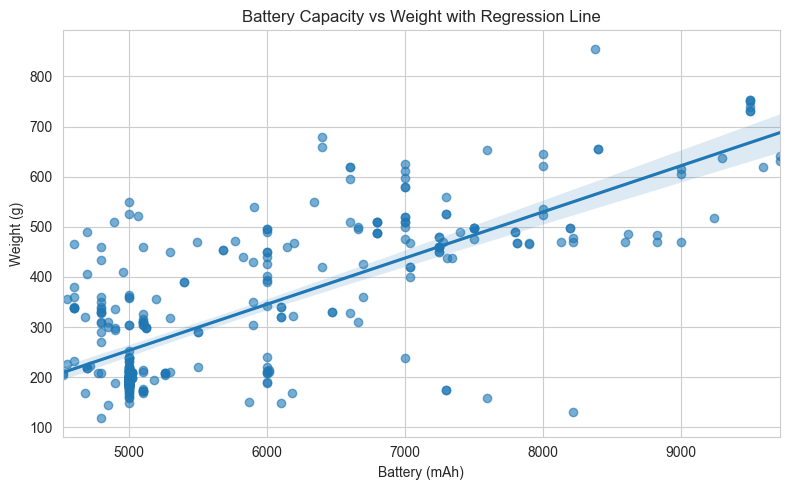

In [296]:
# Let's filter our data for the big battery phones only
high_bat_weight = data[data['battery'] > 4500][['battery','weight']]

# PLot in a scatter plot with a regression line
plt.figure(figsize=(8, 5))
sns.regplot(data=high_bat_weight, x='battery', y='weight', scatter_kws={'alpha':0.6})

plt.title('Battery Capacity vs Weight with Regression Line')
plt.xlabel('Battery (mAh)')
plt.ylabel('Weight (g)')
plt.tight_layout()
plt.show()

#### Observations:
We implemented a scatter plot between both variables and, as it can be seen from the best fit line (it automatically includes a 95% CI which is represented by that shaded area) there seems to be a positive but moderate linear relationship between battery capacity and weight. Larger batteries tend to be found in heavier phones, but the correlation is not very strong due to substantial variation across devices. If you analyse the plot closely, you see how for almost every battery capacity there is a wide range of phone weights, like at 6000 mAh for instance, which suggests that the battery capacity is not the only factor influencing phone weight (probably camera quality and screen size have an impact on total weight too).


In [297]:
# Aggregate our data to see the amount of phones with screens larger than 6 inches across brands
data[data['screen_size'] > 6]['brand_name'].value_counts()

Others        479
Samsung       334
Huawei        251
LG            197
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Vivo          117
Honor         116
Alcatel       115
HTC           110
Micromax      108
Motorola      106
Sony           86
Nokia          72
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Spice          30
Karbonn        29
Celkon         25
Coolpad        22
OnePlus        22
Microsoft      22
BlackBerry     21
Google         15
Infinix        10
Name: brand_name, dtype: int64

In [298]:
# Compute the number of entries with the value Others for the field brand_name
(data['brand_name'] == 'Others').sum()

502

#### Observations:
There is a big range within brands regarding the number of phones in the market with a screen larger than 6 inches. We can see there are some brands with many phones presenting those features like Samsung or Huawei and others presenting very few like Google or Infinix. 

Another interesting appreciation about this data is that we have may registries without a brand registered (502 registries), maybe because there are very small brands or companies. 

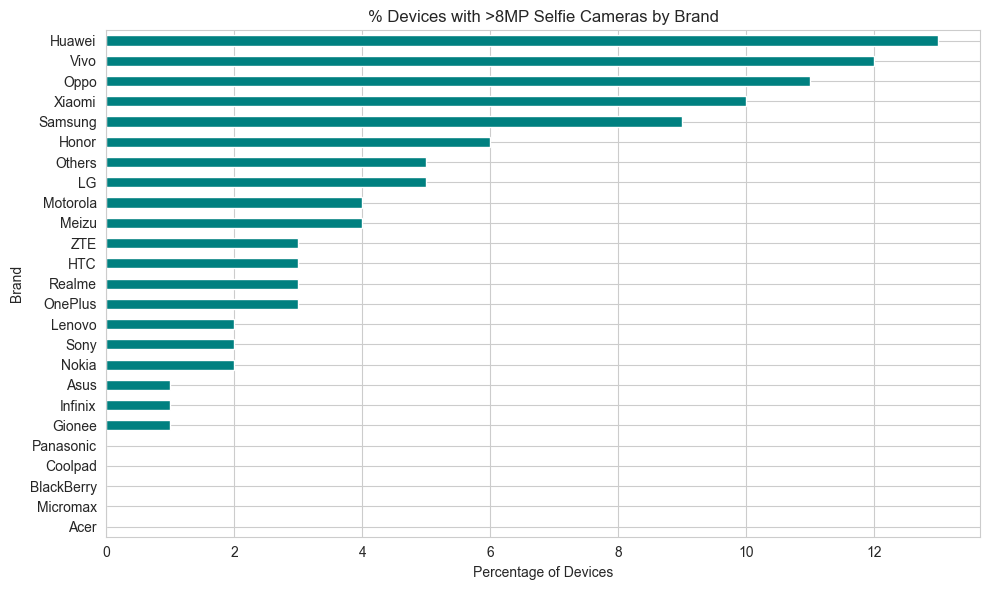

In [299]:
# Filter the data to only get the phones with a selfie camera presenting more than 8MP
high_selfie = data[data['selfie_camera_mp'] > 8]
# Get the proportions per brand
distribution_selfie = high_selfie['brand_name'].value_counts(normalize=True).round(2) * 100
# Plot the results in a hztal barplot
plt.figure(figsize=(10, 6))
distribution_selfie.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('% Devices with >8MP Selfie Cameras by Brand')
plt.xlabel('Percentage of Devices')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

#### Observations:
The distribution shown above depicts some of the different strategies/focus the differents brands have when producing their phones. We can see how Chinese brands like Huawei and Vivo are betting for phones with high resolution selfie cameras as opposed to other brands, despite they are high-quality brands like OnePlus, which might be following a different strategy.

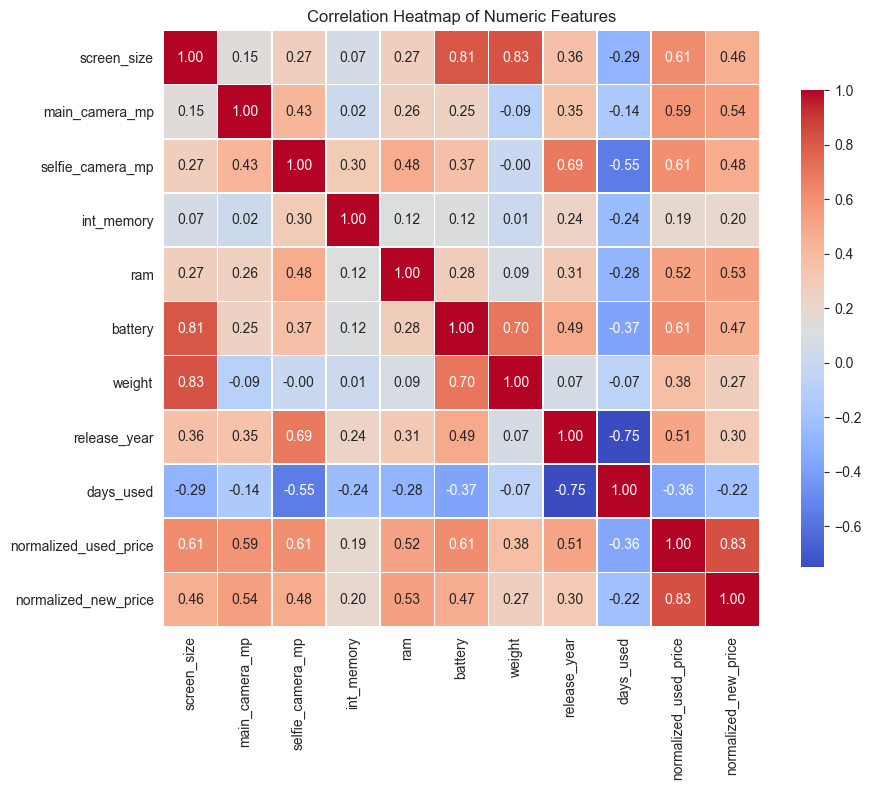

In [300]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap to see the correlation matrix
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix, 
    annot=True, # In order to see the corr value
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    square=True, 
    cbar_kws={"shrink": 0.8} # We shrink the color bar for visual purposes
)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

#### Observations:
The above heatmap only evaluates numerical variables, which are the vast of majority of them and as we'll keep evaluating variable relationship in further stages of the project, will be considered as sufficiently complete this way. The highest positive correlation is observed with the normalized new price, as expected, as newer expensive phones also retain higher used value. Strong positive correlations are also observed with the screen size, cameras (both front and selfie) and battery capacity, which are some of the usual main indicators leading phone price value in the market, and we see the same tendency here. Of course, RAM and release year are the ones that follow, showing a significant positive correlation as well, as processing capacity and generation are often cornerstones of many IT products.
Obviously, related to this, we find days used as the only variable negatively correlated, as we had already inferred from the release year variable.

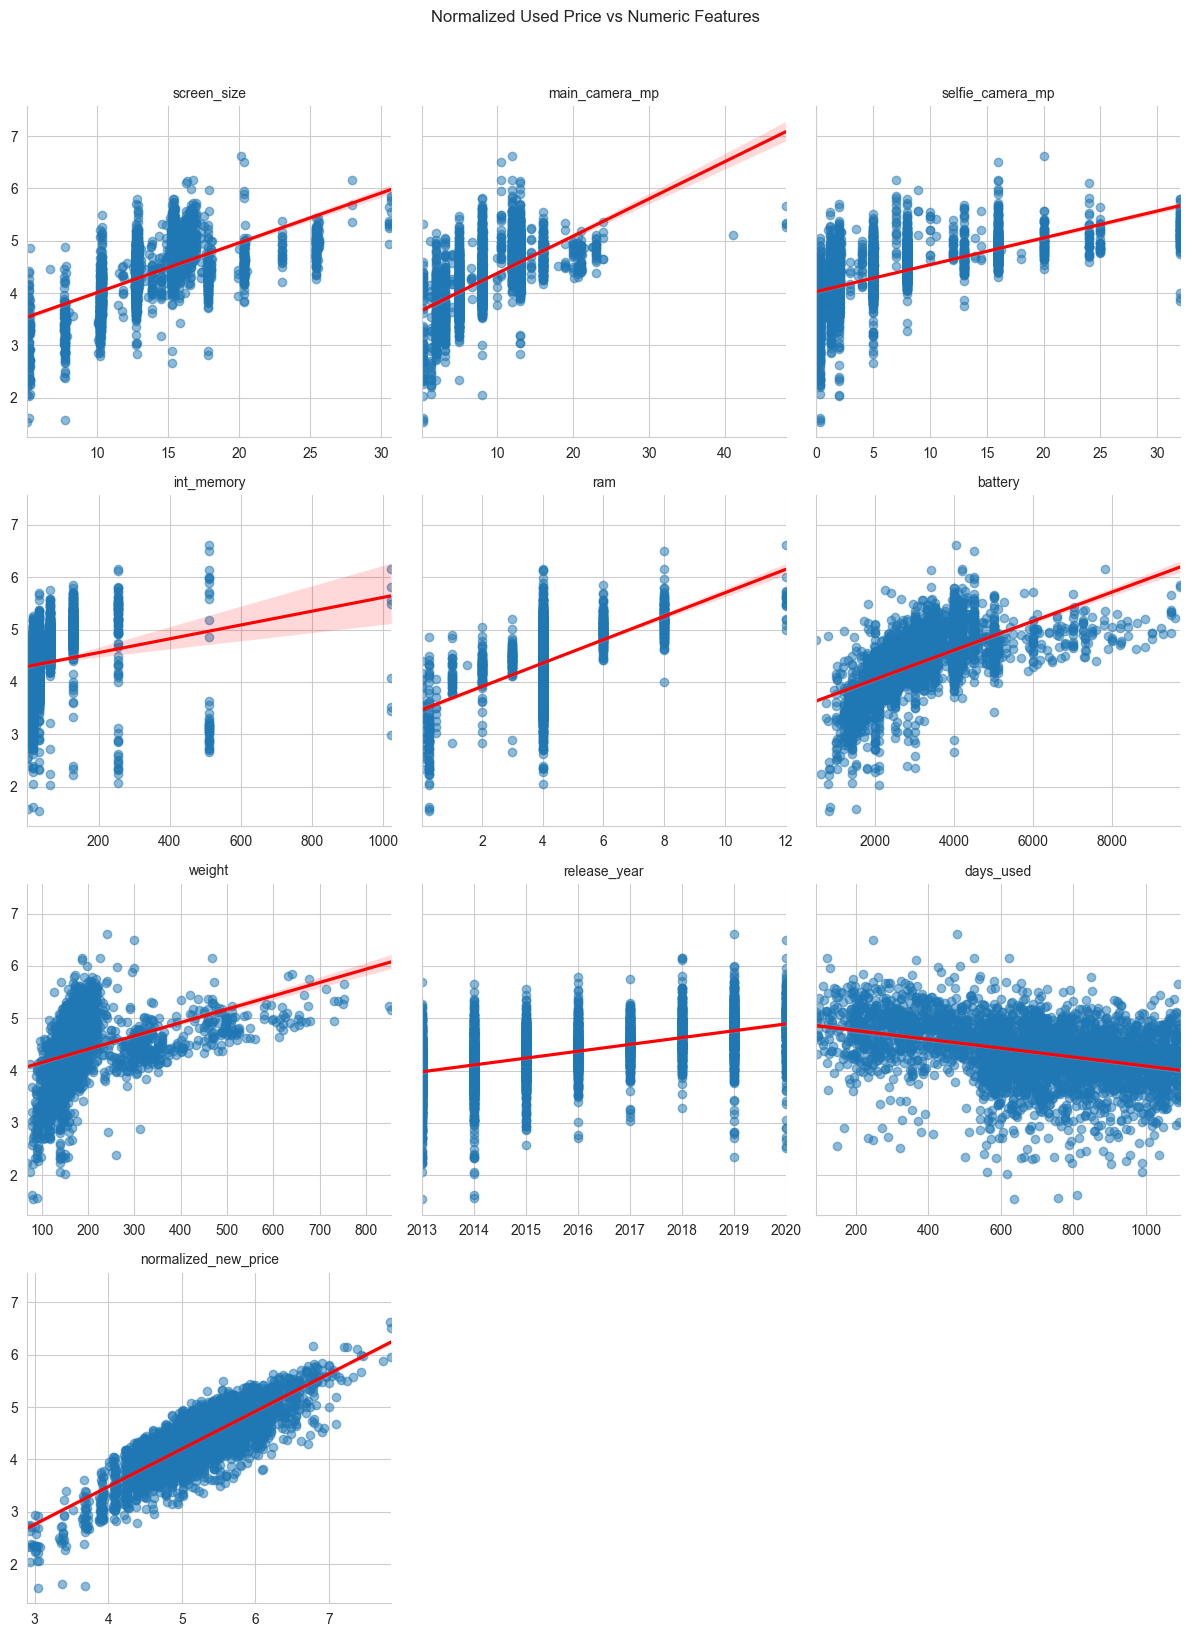

In [301]:
# We are going to use the Pandas function melt for the normalized used price. This is going to allow us to implement a very 
# useful set of scatter plots with regression lines, to visualize the relationships already explored through the heatmap

# To plot it in a grid, for visual easiness, we are going to use Seaborns function FacetGrid, which needs the melted format

target = 'normalized_used_price' # We identify the targer variable
numeric = data.select_dtypes(include='number') # Select only numeric data types
features = numeric.drop(columns=target).columns # We drop the target column from the numeric set and get the column names

# Melt the data 
melted = pd.melt(numeric, id_vars=target, value_vars=features, var_name='Feature', value_name='Value')

# Plot the set of scatter plots with regression line for each feature. We set the parameters to change the scale for x in every 
# plot but share that of y
g = sns.FacetGrid(melted, col='Feature', col_wrap=3, height=4, sharey=True, sharex = False)
g.map_dataframe(sns.regplot, x='Value', y=target, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

# We set the different names
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Normalized Used Price vs Numeric Features', y=1.02)
plt.tight_layout()
plt.show()
    

#### Observations:
We can confirm what we had already seen in the heatmap, the variable: days_used is the only presenting a negative relationship. We can also confirm not only the nature of the relationship: positive or negative, but also the strengths observed with the heatmap. 

Moreover, we observe how some variables do not seem to be linearly related with the target variable, like the resolution of both, front and back cameras. We'll hace to address this in the following analysis by transforming the features if we decide to keep them for the model.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [302]:
# First we are going to impute the median to null values present in the numerical columns of the dataset

numeric_columns = data.select_dtypes(include='number').columns
non_numeric_cols = data.select_dtypes(exclude='number').columns

# We can implement a simple lambda function for this matter as there are only null values in numerical columns. In case
# categorical variables had null values, we would have probably needed a function a bit more complex

median_impute = lambda x: x.fillna(x.median())
imputed = data[numeric_columns].apply(median_impute, axis=0)

data = pd.concat([imputed, data[non_numeric_cols]], axis=1)

In [303]:
# We check that there are no null values any more
data.isna().sum()

screen_size              0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
brand_name               0
os                       0
4g                       0
5g                       0
dtype: int64

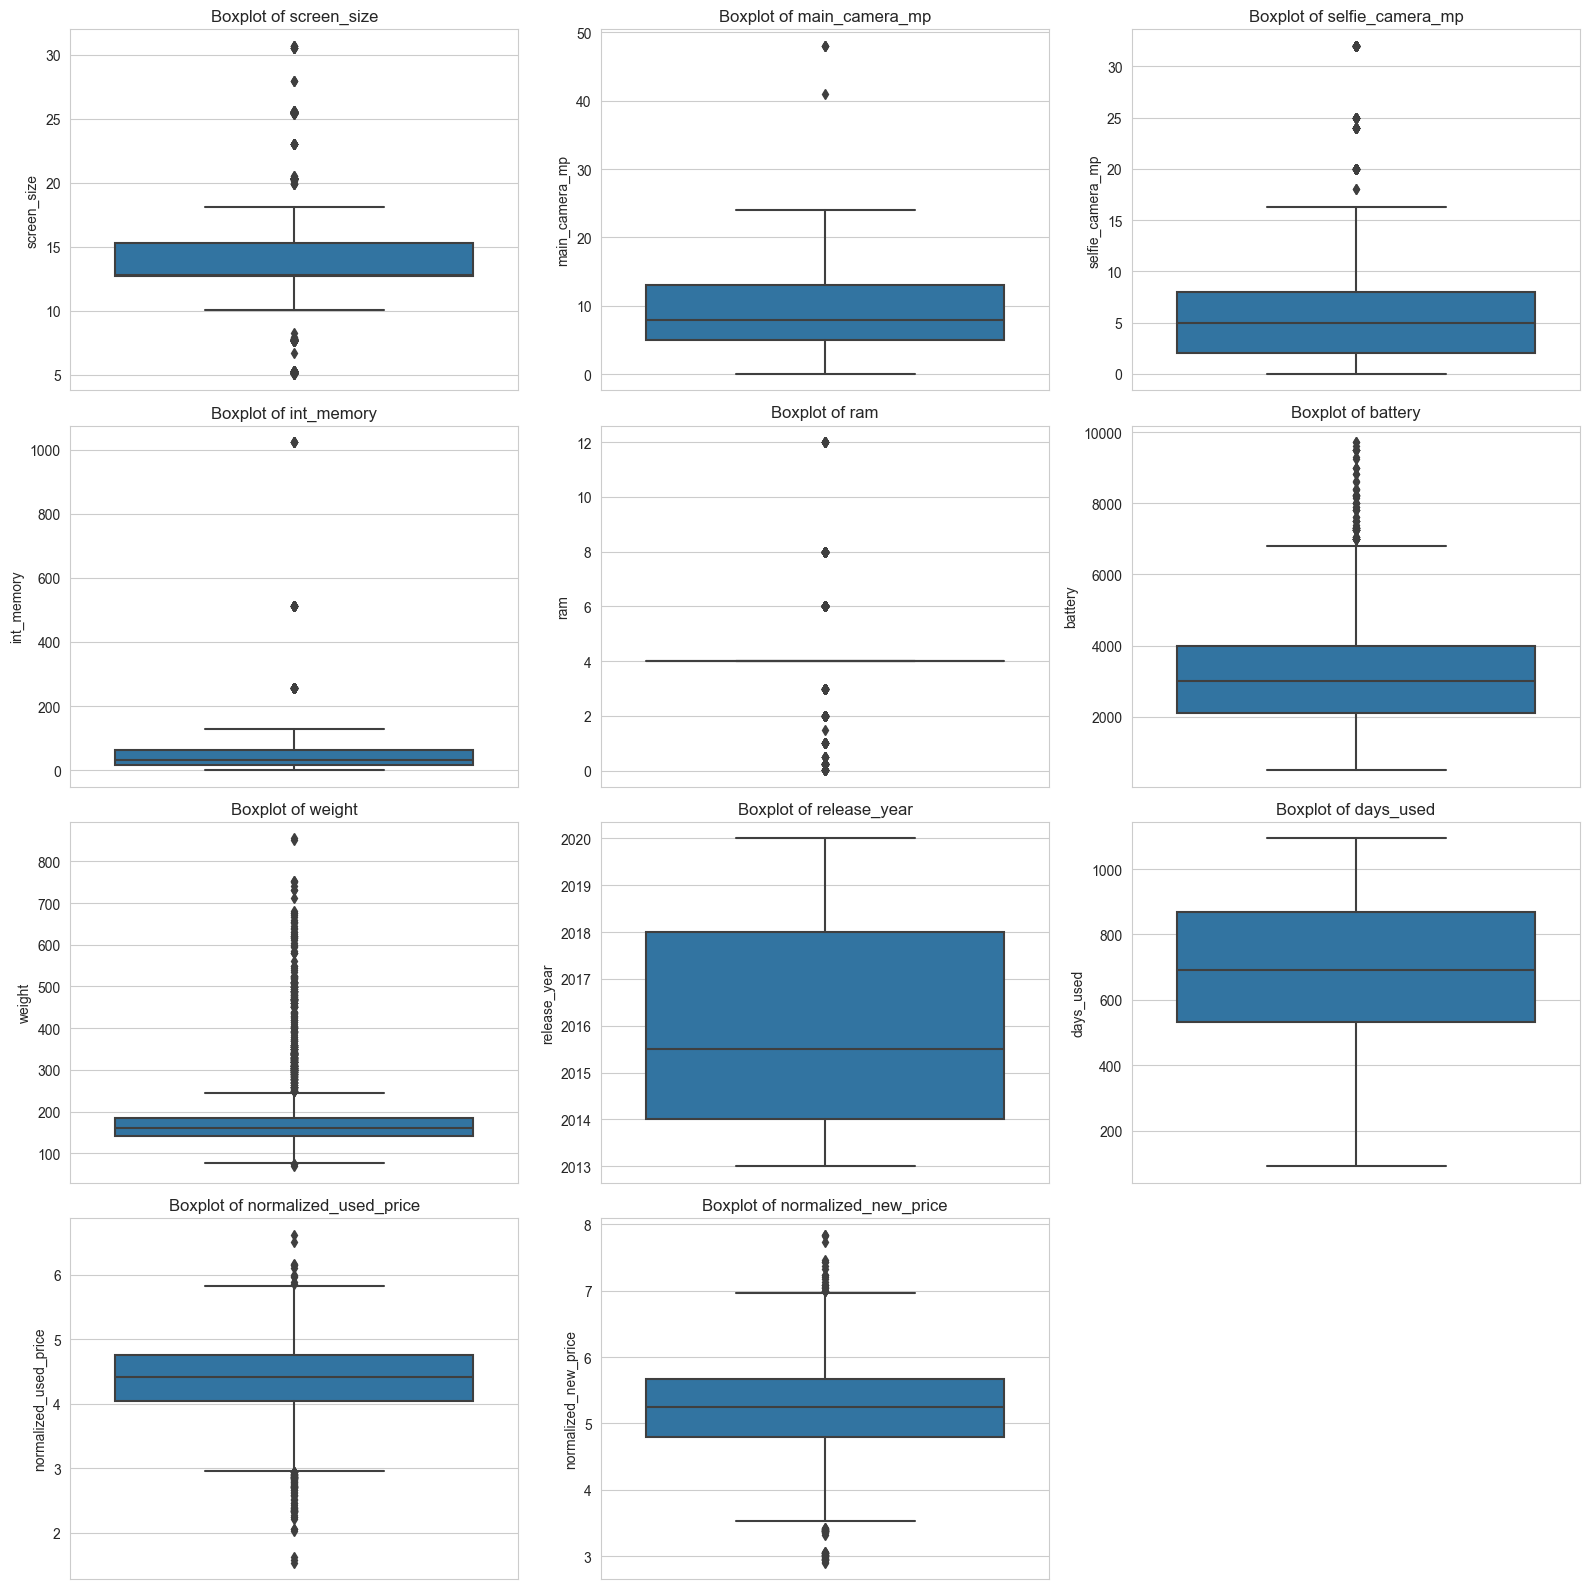

In [304]:
# Outlier Observation through Box Plots

# Set up grid dimensions
n = len(numeric_columns)
cols = 3
rows = int(np.ceil(n / cols)) # We use ceiling division to determine the number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Remove any unused subplots. Note that our plots have gone as far as i, then we remove everything from i+1 to the length
# of the grid created

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Observations:
As seen already from the previous exploratory analysis, variables like RAM, had a high amount of outliers. There are also variables that contain a significant amount of outliers like internal memory, screen size, battery, weight.... However, the values that they represent are most likely real cases, more than typos or errors, consequently they probably carry some valuable information even though they might add some distortion to our model.

We are going to keep the outliers and analyse how the model behaves in order to use every bit of information available. If the behaviour of the model is not what we expected we might have to come back to this step to treat the outliers differently by dropping them or capping their values to reduce distortion.

In [305]:
# We create dummies for the categorical variables as the model only accepts numerical values

data = pd.get_dummies(data, columns=['os', '4g', '5g'], drop_first=True)

In [306]:
# We are going to create bins for the memory as well, as we've seen the data is highly divided into different categories
data['int_memory_bin'] = pd.cut(
    data['int_memory'],
    bins=[0, 64, 256, np.inf],
    labels=['low', 'medium', 'high']
)

# We create the dummies for the variable
data = pd.get_dummies(data, columns=['int_memory_bin'], drop_first=True)

In [307]:
# Instead of dropping the brand name, as it gives us too many different fields due to the high cardinality of the variable,
# let's group them in different bins: premium, mid, upper_mid and budget

def categorize_brand(brand):
    """
    This function gets a brand as an argument and clasifies  it according to the bins defined
    
    Args: brand: string with the name of the brand
    Output: the name of the category according to the brand name introduced
    
    """
    
    if brand in ['OnePlus', 'Apple', 'Google']:
        return 'premium'
    elif brand in ['Vivo', 'Oppo', 'Xiaomi', 'Huawei', 'Honor', 'Meizu', 'Realme', 'Sony']:
        return 'mid'
    elif brand in ['Samsung', 'Motorola', 'HTC', 'Asus', 'Lenovo', 'ZTE']:
        return 'upper_mid'
    else:
        return 'budget'

# We apply the defined function to the brand_name of every row and name the new field: brand_tier
data['brand_tier'] = data['brand_name'].apply(categorize_brand)

# We now create the dummy for brand_tier, having a small number of categories
data = pd.get_dummies(data, columns=['brand_tier'], drop_first=True)


In [308]:
# As we have seen on the scatter plots with fitted lines, there are some varaibles that do not seem to have a linear 
# relationship with the price
# For that matter, we are going to perform some feature transformation

# We transform to logarithmic
for col in ['main_camera_mp', 'selfie_camera_mp']:
    data[f'log1p_{col}'] = np.log1p(data[col])
    
    

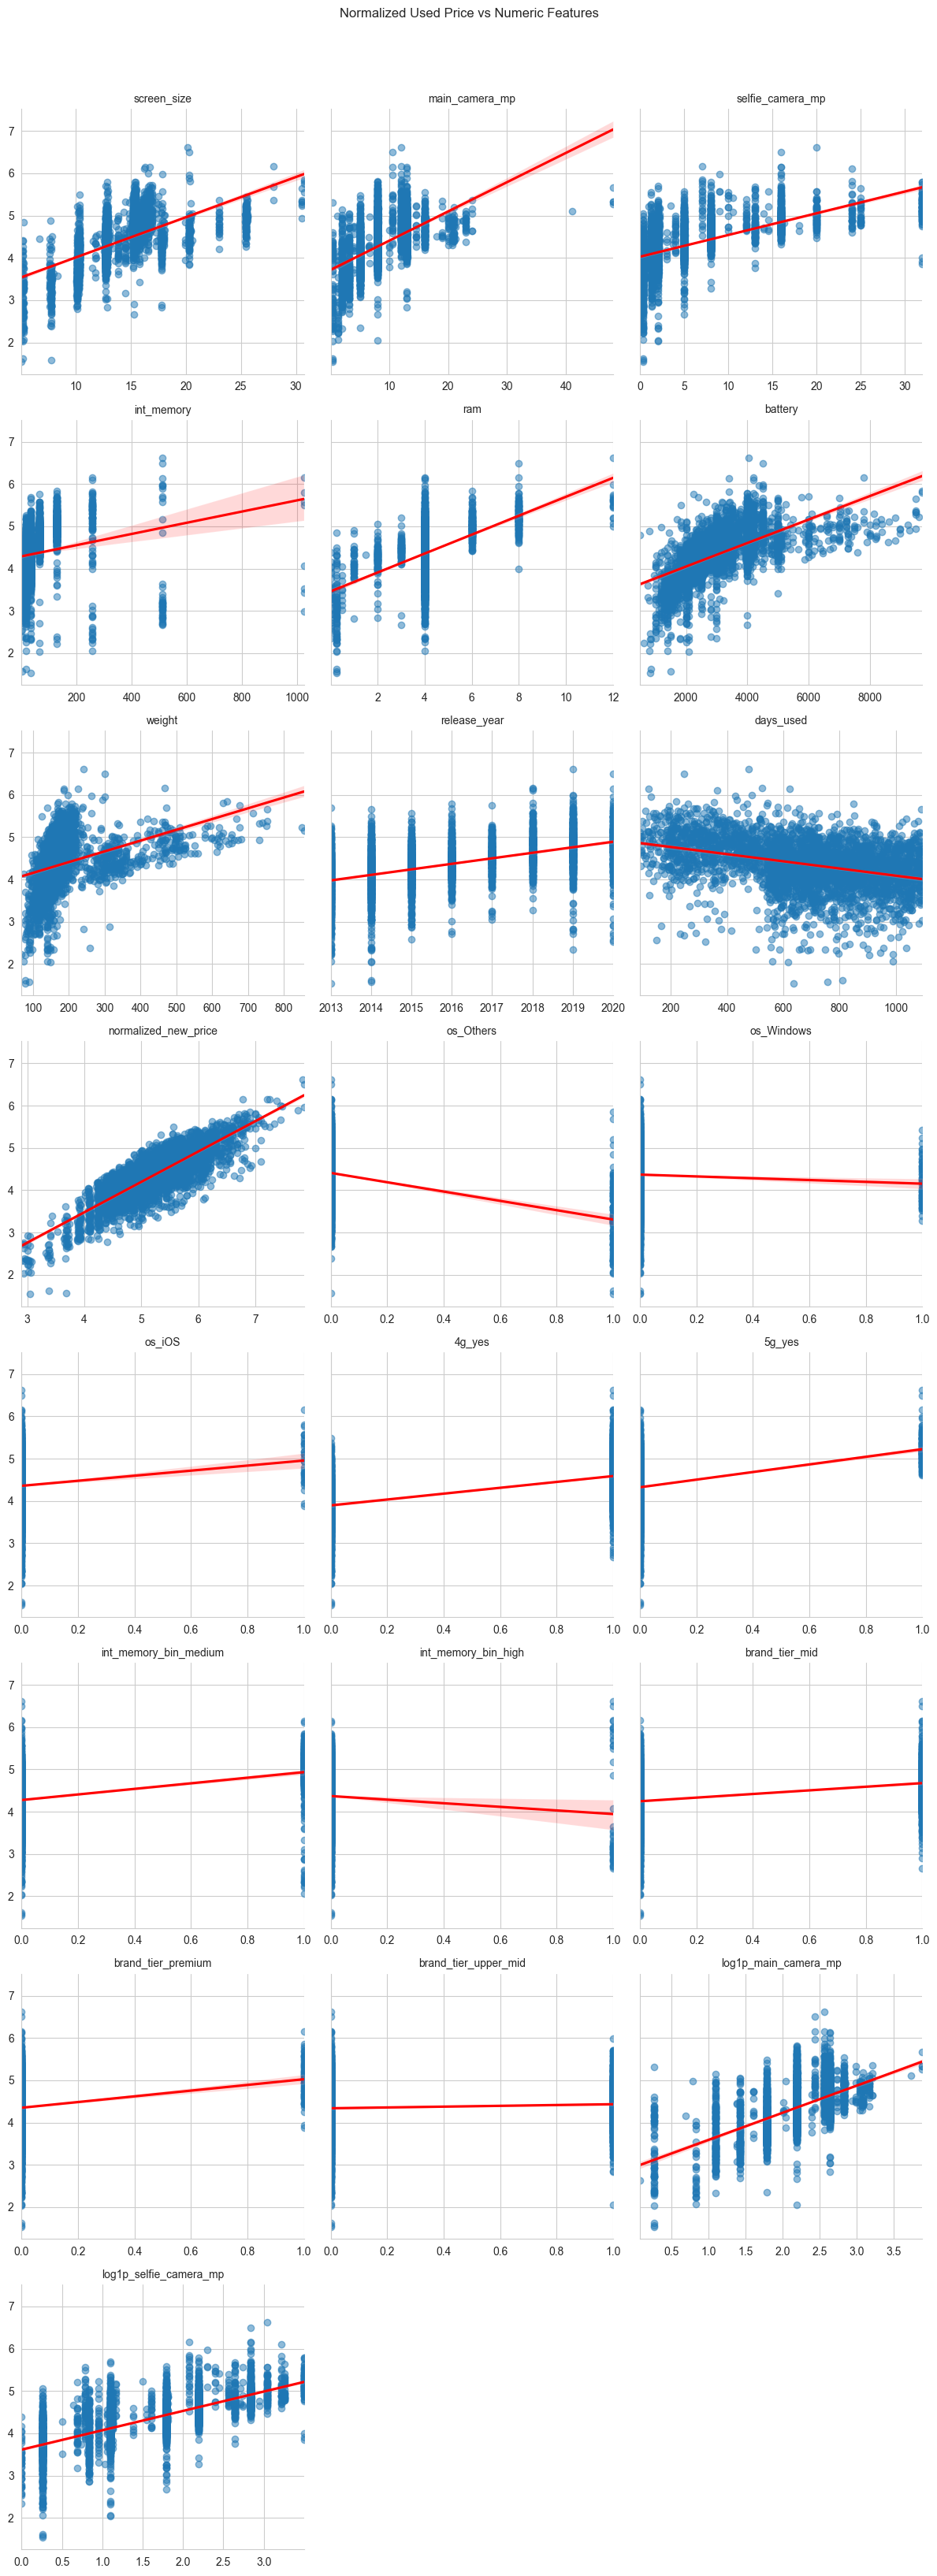

In [309]:
# We are going to use the Pandas function melt for the normalized used price. This is going to allow us to implement a very 
# useful set of scatter plots with regression lines, to visualize the relationships already explored through the heatmap

# To plot it in a grid, for visual easiness, we are going to use Seaborns function FacetGrid, which needs the melted format

target = 'normalized_used_price' # We identify the targer variable
numeric = data.select_dtypes(include='number') # Select only numeric data types
features = numeric.drop(columns=target).columns # We drop the target column from the numeric set and get the column names

# Melt the data 
melted = pd.melt(numeric, id_vars=target, value_vars=features, var_name='Feature', value_name='Value')

# Plot the set of scatter plots with regression line for each feature. We set the parameters to change the scale for x in every 
# plot but share that of y
g = sns.FacetGrid(melted, col='Feature', col_wrap=3, height=4, sharey=True, sharex = False)
g.map_dataframe(sns.regplot, x='Value', y=target, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

# We set the different names
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Normalized Used Price vs Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

#### Observations:

Comparing both variables, the pre transformed and the logarithmic (transformed) we can see an improvement in terms of a clearer linear interpretation. Consequently, we are going to keep the transformations and drop the normal variables.

Moreover, we did some testing on the side (transforming the  days of use feature and observing the relationship with the target variable as well as observing how the model would behave with that variable included) and, due to the nature of both variables: release year an days of use, which are highly correlated (as we had already seen in the heatmap), we decide already to drop days of use. Regarding the market, most customers assess the use of a phone from it's release year. Let's imagine a customer is buying a used phone from the year XXXX, then, the days the phone has been used would be assumed to be: $\text{days_used} = \text{difference in years} \times \dfrac{365 \text{ days}}{1 \text{ year}}$


In [310]:
# Drop the original variables to keep the transformed ones
data = data.drop(['int_memory','main_camera_mp','selfie_camera_mp','days_used','brand_name'], axis=1)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [311]:
# Let's explore the shape first in order to check we have the expected number of rows and columns: ((3454, 26))

print(f'The shape of the processed data is: {data.shape}')

The shape of the processed data is: (3454, 19)


In [312]:
# Let's explore the types, to check we only have numerical types after the dummies

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   screen_size             3454 non-null   float64
 1   ram                     3454 non-null   float64
 2   battery                 3454 non-null   float64
 3   weight                  3454 non-null   float64
 4   release_year            3454 non-null   int64  
 5   normalized_used_price   3454 non-null   float64
 6   normalized_new_price    3454 non-null   float64
 7   os_Others               3454 non-null   uint8  
 8   os_Windows              3454 non-null   uint8  
 9   os_iOS                  3454 non-null   uint8  
 10  4g_yes                  3454 non-null   uint8  
 11  5g_yes                  3454 non-null   uint8  
 12  int_memory_bin_medium   3454 non-null   uint8  
 13  int_memory_bin_high     3454 non-null   uint8  
 14  brand_tier_mid          3454 non-null   

In [313]:
# Let's check the statistical summary, to look for strange values, despite we have to adapt to the new dummies and the 
# logarithmic variables

data.describe()

,screen_size,ram,battery,weight,release_year,normalized_used_price,normalized_new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,int_memory_bin_medium,int_memory_bin_high,brand_tier_mid,brand_tier_premium,brand_tier_upper_mid,log1p_main_camera_mp,log1p_selfie_camera_mp
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,4.036080,3133.170961,182.705761,2015.965258,4.364712,5.233107,0.039664,0.019398,0.010423,0.676028,0.044007,0.132600,0.015055,0.270411,0.022003,0.286624,2.212448,1.640367
std,3.805280,1.364314,1298.565062,88.329494,2.298455,0.588914,0.683637,0.195197,0.137939,0.101573,0.468057,0.205140,0.339191,0.121789,0.444237,0.146716,0.452250,0.558733,0.891989
min,5.080000,0.020000,500.000000,69.000000,2013.000000,1.536867,2.901422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076961,0.000000
25%,12.700000,4.000000,2100.000000,142.000000,2014.000000,4.033931,4.790342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,1.098612
50%,12.830000,4.000000,3000.000000,160.000000,2015.500000,4.405133,5.245892,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,1.791759
75%,15.340000,4.000000,4000.000000,185.000000,2018.000000,4.755700,5.673718,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.639057,2.197225
max,30.710000,12.000000,9720.000000,855.000000,2020.000000,6.619433,7.847841,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.891820,3.496508


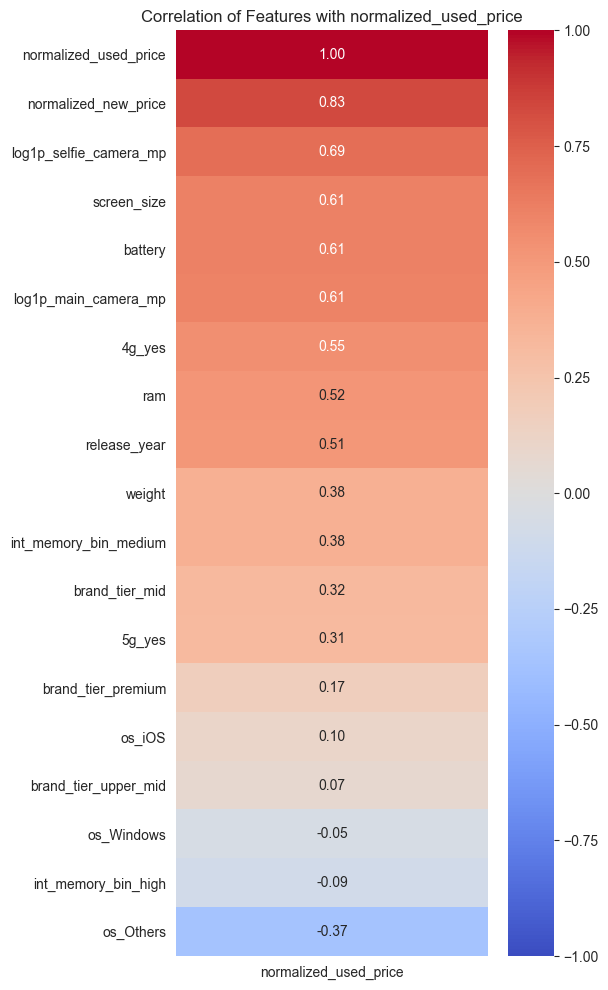

In [314]:
# Let's explore a heatmap of the used price with the rest of variables

target = 'normalized_used_price'
cor_matrix = data.corr()[[target]].sort_values(by=target, ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f'Correlation of Features with {target}')
plt.tight_layout()
plt.show()


#### Observations:

After this quick analysis of the processed dataset, everything looks reasonable. We observe many of the new dummy and binned variables really have very little correlation with the normalized used price like os_Windows, int_memory_bin_high or brand_tier_upper_mid. However, as we move forward, we'll decide whether or not to keep these features in our model.

As the dimensions of the dataset, the statistical summary and the correlation between variables seem correct, we move on to build the model.

## Model Building - Linear Regression

In [315]:
# Define target variables and features
target = 'normalized_used_price'

X = data.drop(columns=[target])
y = data[target]

# Add constant term (intercept) to X
X = sm.add_constant(X)

# Train-test split (optional but good for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit()

## Model Performance Check

In [316]:
# Print model summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     712.0
Date:                   Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                           17:46:12   Log-Likelihood:                 35.277
No. Observations:                   2417   AIC:                            -32.55
Df Residuals:                       2398   BIC:                             77.46
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Observations:
Looking at the model performance summary we can already see a powerful explanatory power with a $R^2 = 0.843$, which is a very good indicator for our model: it can explain 84.3% of the variance in the training set. We can also see that we have many variables with very low p-values like log1p_int_memory, log1p_selfie_camera_mp , ram or weight, indicating they are meaningful predictors. 

However, there are also many variables with high p-values which might indicate limited contribution to the model and potential multicollinearity issues, something we had foreseen already due to the overlapping nature of categorical groupings such as brand and operating system.

Nevertheless, in order to trust the p-values, thus, in order to have reliable p-values, we need to reduce multicollinearity as much as we can. Let's study the multicollinearity of our model:

In [317]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                     3.058189e+06
screen_size               7.040613e+00
ram                       2.163472e+00
battery                   4.106273e+00
weight                    5.828171e+00
release_year              3.926412e+00
normalized_new_price      2.921975e+00
os_Others                 1.581001e+00
os_Windows                1.035826e+00
os_iOS                    2.022429e+00
4g_yes                    2.368991e+00
5g_yes                    1.787262e+00
int_memory_bin_medium     1.769835e+00
int_memory_bin_high       1.079121e+00
brand_tier_mid            1.663445e+00
brand_tier_premium        2.136865e+00
brand_tier_upper_mid      1.377915e+00
log1p_main_camera_mp      2.625242e+00
log1p_selfie_camera_mp    4.243943e+00
dtype: float64



##### Observations:
There are no alarming values for VIF (above 8), which is a good indicator, but there are some variables that show some dependencies with the rest like screen size or weight, which are naturally related.
Looking at the p-values of variables in the model's statistical summary and thinking about the natural relationship of the variables as well as common features of the cell phone market (new or used), we are going to try to remove the variables that are probably not adding that much value compared to the noise, distortion and the risk of overfitting they imply.

Considering the fact that the values for VIFs obtained are not that large for any of the variables we could think that screen size, being the biggest and naturally related to battery and weight, should be the one to drop. However, taking the initial p-values as a guide, we are going to drop battery. It has a significantly higher p-value and some of the highest VIF obtained:

In [318]:
# Define target and features
target = 'normalized_used_price'

# List of columns you want to drop
cols_to_drop = ['battery']

# Keep only those that actually exist in the DataFrame
existing_cols = [col for col in cols_to_drop if col in data.columns]

# Drop only existing columns
data_5 = data.drop(columns=existing_cols)

X = data_5.drop(columns=[target])
y = data_5[target]

# Add constant term (intercept) to X
X = sm.add_constant(X)

# Train-test split (optional but good for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     752.9
Date:                   Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                           17:46:27   Log-Likelihood:                 33.515
No. Observations:                   2417   AIC:                            -31.03
Df Residuals:                       2399   BIC:                             73.20
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### Observations:
The $R^2$ and $adjusted-R^2$ are exactly the same, suggesting we could drop that variable from our model. The rest of the statistics seem to be farily stable, let's now look at multicollinearity:

In [319]:
# Computation of VIFs

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
# Printing the results
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                     2.938722e+06
screen_size               6.522926e+00
ram                       2.163197e+00
weight                    5.154846e+00
release_year              3.773887e+00
normalized_new_price      2.917702e+00
os_Others                 1.571186e+00
os_Windows                1.030817e+00
os_iOS                    2.020252e+00
4g_yes                    2.348840e+00
5g_yes                    1.787236e+00
int_memory_bin_medium     1.769833e+00
int_memory_bin_high       1.078984e+00
brand_tier_mid            1.660450e+00
brand_tier_premium        2.136860e+00
brand_tier_upper_mid      1.375513e+00
log1p_main_camera_mp      2.605359e+00
log1p_selfie_camera_mp    4.232070e+00
dtype: float64



##### Observations
Screen size still has a notably larger VIF than the rest of features, so, at this point, the right direction for improving the model seems to be dropping it and test the performance:

In [320]:
# Define target and features
target = 'normalized_used_price'

# List of columns you want to drop
cols_to_drop = ['screen_size']

# Keep only those that actually exist in the DataFrame
existing_cols = [col for col in cols_to_drop if col in data_5.columns]

# Drop only existing columns
data_6 = data_5.drop(columns=existing_cols)

X = data_6.drop(columns=[target])
y = data_6[target]

# Add constant term (intercept) to X
X = sm.add_constant(X)

# Train-test split (optional but good for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     783.8
Date:                   Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                           17:46:42   Log-Likelihood:                 12.336
No. Observations:                   2417   AIC:                             9.328
Df Residuals:                       2400   BIC:                             107.8
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### Observations:

From the summary above we can see that the $R^2$ and $adjusted-R^2$ have slightly decreased, which is not in our interest as it indicates less predictable power. However, let's study multicollinearity first, before deciding whether to keep or not the variable:

In [321]:
# Computation of VIFs
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)

# Printing the results
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                     2.693769e+06
ram                       2.162513e+00
weight                    1.276930e+00
release_year              3.455557e+00
normalized_new_price      2.873852e+00
os_Others                 1.362246e+00
os_Windows                1.030050e+00
os_iOS                    2.012011e+00
4g_yes                    2.345129e+00
5g_yes                    1.784206e+00
int_memory_bin_medium     1.767917e+00
int_memory_bin_high       1.077418e+00
brand_tier_mid            1.641539e+00
brand_tier_premium        2.132591e+00
brand_tier_upper_mid      1.371996e+00
log1p_main_camera_mp      2.589777e+00
log1p_selfie_camera_mp    4.228571e+00
dtype: float64



##### Observations:

The values obtained from the VIF analysis are significantly smaller compared to those we obtained earlier, specially for variables like weight, where we see a sharp reduction (as probably, sreen size and battery were strongly related to it). Consequently, we choose to keep this model and then trust the p-values obtained.

Guided by the p-values we are now going to remove every variable with a $p-value > 0.05$ now (we did this step one by one, but we'll summarize it into one step for simplicity and easiness to read). We are not going to remove the os_iOS variable for now, but everything indicates that we probably will, let's see the model behaviour:

In [322]:
# Define target and features
target = 'normalized_used_price'

# List of columns you want to drop
cols_to_drop = ['int_memory_bin_high', 'brand_tier_mid', 'brand_tier_premium', 
                'brand_tier_upper_mid','os_Windows',
                '4g_yes', '5g_yes']

# Keep only those that actually exist in the DataFrame
existing_cols = [col for col in cols_to_drop if col in data_6.columns]

# Drop only existing columns
data_final = data_6.drop(columns=existing_cols)

X = data_final.drop(columns=[target])
y = data_final[target]

# Add constant term (intercept) to X
X = sm.add_constant(X)

# Train-test split (optional but good for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1393.
Date:                   Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                           17:46:52   Log-Likelihood:                 9.3099
No. Observations:                   2417   AIC:                             1.380
Df Residuals:                       2407   BIC:                             59.28
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### Observations:

The drop observed in both: $R^2$ and $adjusted-R^2$ is sufficiently small to be worth the simplicity and statistical significance of every variable gained with the dropping of the variables, thus, we'll decide to keep this model. However, as predicted, the dummy variable for iOS does not seem to be relevant still (large p-value) as, following previous reasonings, the price is more related to the specifications than the OS or the brand name:

In [323]:
# Define target and features
target = 'normalized_used_price'

# List of columns you want to drop
cols_to_drop = ['os_iOS']

# Keep only those that actually exist in the DataFrame
existing_cols = [col for col in cols_to_drop if col in data_final.columns]

# Drop only existing columns
data_final = data_final.drop(columns=existing_cols)

X = data_final.drop(columns=[target])
y = data_final[target]

# Add constant term (intercept) to X
X = sm.add_constant(X)

# Train-test split (optional but good for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

# Fit OLS model
model = sm.OLS(y_train, X_train)
model_fit = model.fit()
# Print model summary
print(model_fit.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1565.
Date:                   Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                           17:47:01   Log-Likelihood:                 7.4972
No. Observations:                   2417   AIC:                             3.006
Df Residuals:                       2408   BIC:                             55.12
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### Observations:
Finally, we see that after dropping that last feature: os_iOS, we obtain a model as strong as before in terms of predictability ($R^2$ and $adjusted-R^2$) and all of our features seem to be statistically significant if we look at the p-values obtained. 

Thus, we are going to keep this model and check multicollinearity one last time before moving on to the assumptions:


In [324]:
# Compute the VIF
vif_series_final = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
# Print results
print("VIF values: \n\n{}\n".format(vif_series_final))

VIF values: 

const                     2.162548e+06
ram                       1.658883e+00
weight                    1.245865e+00
release_year              2.778356e+00
normalized_new_price      2.489499e+00
os_Others                 1.333866e+00
int_memory_bin_medium     1.654470e+00
log1p_main_camera_mp      2.329471e+00
log1p_selfie_camera_mp    4.068613e+00
dtype: float64



##### Observations:

We do not see large values for any of the VIFs obtained for the variables, thus, we conclude that our variables are independent enough (despite some values obtained like that of the logarithmic transformation of the selfie camera mp). We are now going to check for the Linear Regression assumptions.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

We are going to start by checking the Linearity. For such analysis we are going to plot fitted values vs residuals. 

If there is no observable pattern, then we say the model is linear. Otherwise, the model will be showing signs of non-linearity.

In [325]:
# Define the dataframe for the fitted, residual and actual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = model_fit.fittedvalues.values  # predicted values
df_pred["Residuals"] = model_fit.resid.values  # residuals

# Print the head of the dataframe
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,5.147087,4.927879,0.219208
1,2.386926,2.868742,-0.481816
2,4.701843,5.187565,-0.485722
3,3.999668,3.809499,0.190169
4,3.974810,4.138914,-0.164104


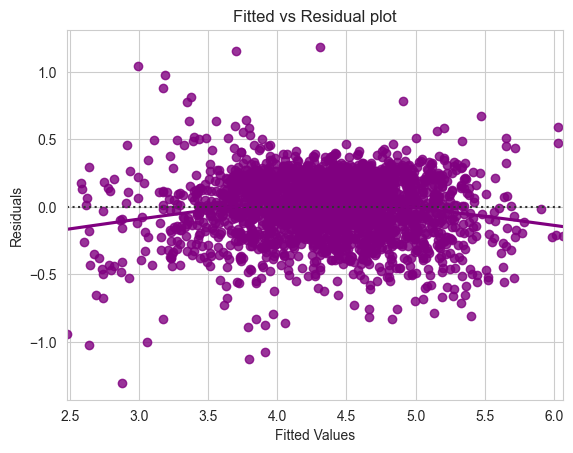

In [326]:
# let us plot the fitted values vs residuals
# We set a whitegrid for clarity and easiness to distinguish magnitudes
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
# We set Labels and Titles
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

##### Observations:
The residuals are evenly distributed around the horizontal line at zero across the fitted values. There’s no obvious/strong pattern or structure, which means the relationship between predictors and the target is approximately linear.

There is however a slight bowing at the tails which might indicate a mild non-linearity at the extremes, but we do not consider it strong enough to invalidate the linear model.

We are now going to check for the normality to check whether error terms/residuals are normally distributed. We are going to do so by plotting the histogram of the residuals as well as through the Q-Q plot and Shapiro test:

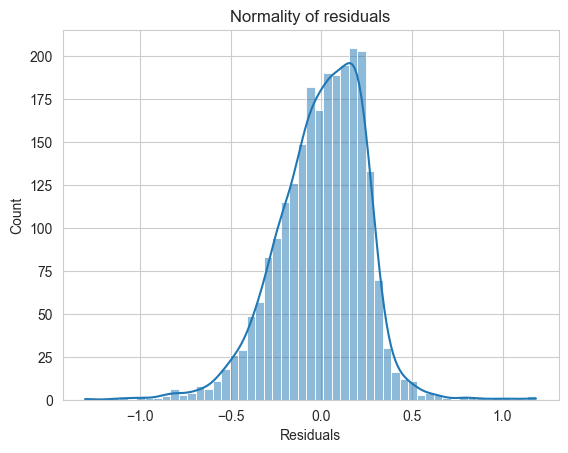

In [327]:
# Plot histogram of residuals

sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

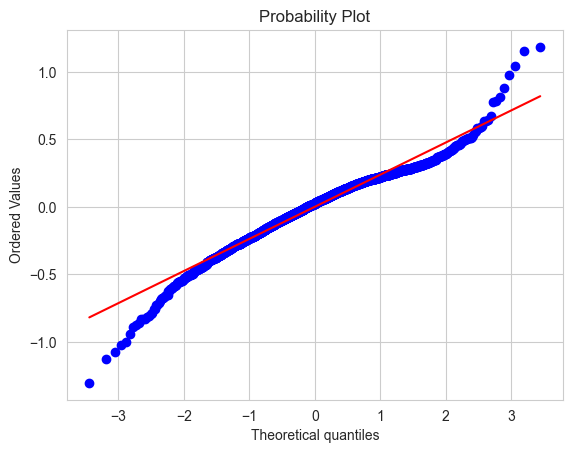

In [328]:
# Q-Q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The Q-Q test clearly shows curvature in tails which leads us to think that residuals deviate from a normal distribution. We'll finally address this through the Shapiro test:

In [329]:
# Compute the Shapiro test for residuals
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9711641669273376, pvalue=1.186108537896243e-21)

##### Observations

We have to take into account that OLS is robust to non-normal residuals when n (sample size) is large. With more than 3400 rows and solid model diagnostics (no multicollinearity, linearity looks proper, strong $R^2$), normality of residuals is not such a concern for OLS. Since we have a large number of samples, small deviations from normality do not invalidate OLS estimates or inferences thanks to the Central Limit Theorem (CLT).

Consequently, we are going to consider the normality check and tests as satisfactory. We are going to move on to check Homoscedasticty to check for the presence of non-constant variance in the error terms, which usually arises with outliers. We are going to implement the goldfeldquandt test: if we get $p-value > 0.05$ we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

In [330]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Carry out the Goldfeldquant test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 0.9681002911115338), ('p-value', 0.712692629105204)]

Since the we obtained: $p-value > 0.05$, we can conclude that the residuals are homoscedastic.

#### Final Model Observations:
The $R^2$ of the model is 0.839 and the $adjusted R^2$ is 0.838, which shows that the model is able to explain approximately 84% of the variance in the data. This is a quite  solid result in terms of predictability.

A unit increase in the model year will result in a 0.0269 unit increase in the used cellphone price, all other variables remaining constant.

The normalized used price of a cellphone with an operating system that's not any of the two main options: Android or iOS, will be 0.0890 units lower than those operating on Android or iOS, all other variables remaining constant.

The normalized used prices of a cellphone with a mid range internal memory will be 0.0614 units higher than that of a phone with an internal memory outside of this class ([64,256]GB).


## Final Model

In [331]:
# Let us write the equation of linear regression
# Start with the intercept
terms = [f"{model_fit.params[0]:.4f}"]

# Add each coefficient and feature
for coef, col in zip(model_fit.params[1:], X_train.columns[1:]):
    terms.append(f"{coef:.4f} * {col}")

# Join everything into a formula
equation = "Normalized_Used_Price = " + " + ".join(terms)
print(equation)

Normalized_Used_Price = -53.1208 + 0.0214 * ram + 0.0017 * weight + 0.0269 * release_year + 0.4158 * normalized_new_price + -0.0890 * os_Others + 0.0614 * int_memory_bin_medium + 0.1874 * log1p_main_camera_mp + 0.1305 * log1p_selfie_camera_mp


In [332]:
# Check the columns of the X training dataset
X_train.columns

Index(['const', 'ram', 'weight', 'release_year', 'normalized_new_price',
       'os_Others', 'int_memory_bin_medium', 'log1p_main_camera_mp',
       'log1p_selfie_camera_mp'],
      dtype='object')

In [333]:
# Check the columns of the X testing dataset to see if they're the same as the X training datset
X_test.columns

Index(['const', 'ram', 'weight', 'release_year', 'normalized_new_price',
       'os_Others', 'int_memory_bin_medium', 'log1p_main_camera_mp',
       'log1p_selfie_camera_mp'],
      dtype='object')

In [334]:
# let's make predictions on the test set
y_pred = model_fit.predict(X_test)

In [335]:
# Compute the root mean squared error on the Training dataset
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
# Print results
print(f"The RMSE computed is: {rmse1}")

The RMSE computed is: 0.24122132374401328


In [337]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
# Print results
print(f"The RMSE computed is: {rmse2}")

The RMSE computed is: 0.22219909212730168


In [339]:
# let's check the Mean Absolute Error (MAE) on the train data

mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
# Print results
print(f"The MAE computed is: {mae1}")

The MAE computed is: 0.18755053550217773


In [340]:
# let's check the MAE on the test data

mae2 = mean_absolute_error(y_test, y_pred)
# Print results
print(f"The MAE computed is: {mae2}")

The MAE computed is: 0.17892449782291125


##### Observations
We can see that RMSE on the train and test datasets are notably comparable, implying that our model does not suffer from overfitting.
Through MAE we are able to know our current model is able to predict cell phone normalized used price within a mean error of 0.17 units on the test data.
Hence, we can conclude our model is robust and reliable for both prediction and inference.

## Actionable Insights and Recommendations

- Performance specifications matter the most: RAM, camera quality (both back and selfie) and internal memory are major price drivers.

- The original new price is critical. A device that was expensive when new retains then some of that value proportionally when being sold as a used device.

- Release year is key: cellphones released more recently hold notably more value.

- Main Operating System influences the price: deviating from the mainstream (iOS or Android) reduces resale appeal (price).

- Some specifications like weight may be acting as proxies for other premium attributes like a large battery or a bigger screen.

*Practical Advice for ReCell:*

- When building resale pricing models you should prioritize technical specifications over brand.

- Focus pricing models around the following: original price + camera + RAM + release year.

- Consider excluding brand and even screen size or abttery if they don’t add much once specifications are accounted for.


___